In [40]:
# Dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import json
import random
from citipy import citipy
import numpy as np
import matplotlib.pylab as plb
import openweathermapy.core as ow
# from config import api_key
from urllib.error import HTTPError

In [5]:
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": "25bc90a1196e6f153eece0bc0b0fc9eb"}
weather_data = []

In [6]:
# Pull 500 Randomly Generated City Coordinates
lat = []
lon = []
cities = set([])

# While loop will populate cities set until it reaches 500 non repeating cities
while len(cities) < 1000: #Use this when you are finally ready to run program for 500 cities  
    lati = (random.randrange(-90,90,1))
    long = (random.randrange(-180,180,1))
    city = citipy.nearest_city(lati,long)
    city = city.city_name
    lat.append(lat)
    lon.append(long)
    cities.add(city)

cities = list(cities)

In [7]:
# Create a list to store JSONs of the weather data results and start a counter to run through randomly generated cities
weather_data = []
counter = []
count = 0

# Run a for loop that runs through the list of cities
for city in cities:
    if count < 500:
        try:
            data = ow.get_current(city, **settings)
            weather_data.append(data)
            count = count + 1
            counter.append(count)
        except Exception as e:
            print(city, ": not found  ", e)
            continue
            
            
# Generate a data frame from 500 callable cities    
summary = ["name", "dt","sys.country","coord.lat", "coord.lon", "main.temp_max", "main.humidity", "clouds.all", "wind.speed"]
data = [response(*summary) for response in weather_data]
column_names = ["City", "Time", "Country", "Latitude", "Longitude", "Temperature", "Humidity", "Cloud Coverage", "Wind Speed"]
weather_data = pd.DataFrame(data, index = counter, columns=column_names)


khormuj : not found   HTTP Error 404: Not Found
atlantic city : not found   HTTP Error 404: Not Found
ust-kamchatsk : not found   HTTP Error 404: Not Found
camana : not found   HTTP Error 404: Not Found
sakakah : not found   HTTP Error 404: Not Found
umzimvubu : not found   HTTP Error 404: Not Found
bacuit : not found   HTTP Error 404: Not Found
meyungs : not found   HTTP Error 404: Not Found
bargal : not found   HTTP Error 404: Not Found
chagda : not found   HTTP Error 404: Not Found
fevralsk : not found   HTTP Error 404: Not Found
attawapiskat : not found   HTTP Error 404: Not Found
grand river south east : not found   HTTP Error 404: Not Found
hurghada : not found   HTTP Error 404: Not Found
mutsamudu : not found   HTTP Error 404: Not Found
belushya guba : not found   HTTP Error 404: Not Found
palabuhanratu : not found   HTTP Error 404: Not Found
kadykchan : not found   HTTP Error 404: Not Found
safaga : not found   HTTP Error 404: Not Found
geresk : not found   HTTP Error 404: Not 

In [8]:
# Generate a print out list of cities
cities_list = weather_data
cities_list.to_csv("Cities_Output.csv")

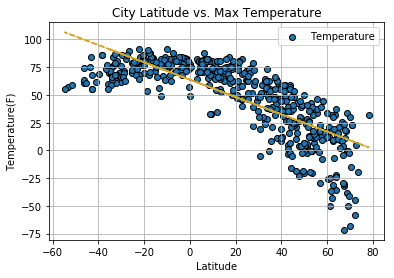

In [57]:
# Build a scatter plot for lat v. temp
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

z = np.polyfit(weather_data["Latitude"], weather_data["Temperature"], 1)
p = np.poly1d(z)
plb.plot(weather_data["Latitude"], p(weather_data["Latitude"]), 'm-', color = 'goldenrod', linestyle= "--")

 

# Save the figure
plt.savefig("LatvMaxTemp.png")

# Show plot
plt.show()

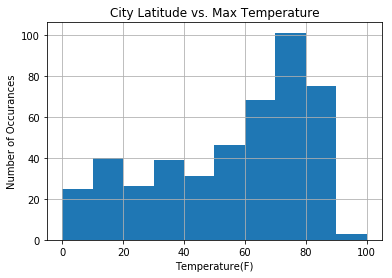

In [34]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(weather_data["Temperature"], bins, histtype ='bar')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Temperature(F)")
plt.ylabel("Number of Occurances")
plt.grid(True)
plt.show()

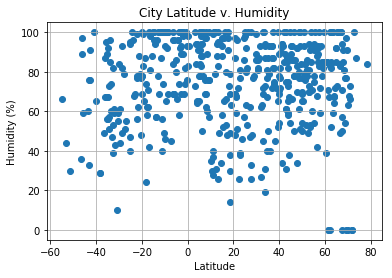

In [10]:
# Build a scatter plot for lat v. humidity
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude v. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvHum.png")

# Show plot
plt.show()

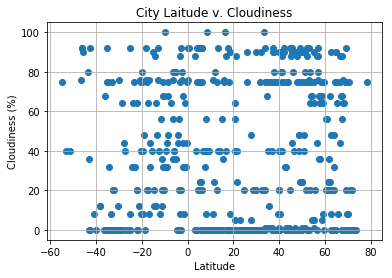

In [11]:
# Build a scatter plot for temp v. cloudiness
plt.scatter(weather_data["Latitude"], weather_data["Cloud Coverage"], marker="o")

# Incorporate the other graph properties
plt.title("City Laitude v. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvCloudiness.png")

# Show plot
plt.show()

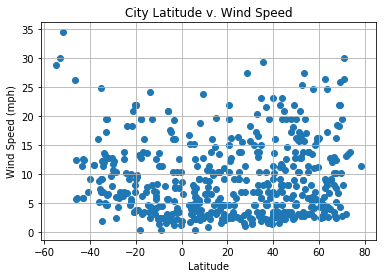

In [12]:
# Build a scatter plot for temp v. wind speed
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude v. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvWind.png")

# Show plot
plt.show()